# Lasso and Inductive conformal predictor

In [1]:
#Importing modules
import numpy as np
import math
import matplotlib.pyplot as plt

Loading Diabetes Dataset from Sklearn

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

Splitting the data into Traning and test set with random state 

In [3]:
#Splitting the data into Traning and test set with random state DDMM
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,random_state=100)

In [4]:
np.shape(X_train)

(331, 10)

In [5]:
np.shape(X_test)

(111, 10)

# Applying Lasso

In [6]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)

In [7]:
lasso.coef_

array([  0.        ,   0.        , 346.25989818,  76.4912648 ,
         0.        ,   0.        ,  -4.53700643,   0.        ,
       304.60712921,   0.        ])

In [8]:
print("Training R Square: ", lasso.score(X_train,y_train))
print("Test R Square: ",lasso.score(X_test,y_test))

Training R Square:  0.3710490118794657
Test R Square:  0.32847652173697683


In [9]:
print("Number of features used in the model:",np.sum(lasso.coef_!= 0))

Number of features used in the model: 4


In [10]:
print("The features used are:\n")
index = np.where(lasso.coef_ != 0)[0]
for i in index:
    print(diabetes.feature_names[i])


The features used are:

bmi
bp
s3
s5


Loading Original Diabetes Dataset

In [11]:
diabetes_data = np.genfromtxt("diabetes.txt", delimiter="\t")
np.shape(diabetes_data)

(443, 11)

In [12]:
#Cleaning data to remove rows with NaN
diabetes_data = diabetes_data[~np.isnan(diabetes_data).any(axis=1),:]

In [13]:
diabetes_data

array([[ 59.    ,   2.    ,  32.1   , ...,   4.8598,  87.    , 151.    ],
       [ 48.    ,   1.    ,  21.6   , ...,   3.8918,  69.    ,  75.    ],
       [ 72.    ,   2.    ,  30.5   , ...,   4.6728,  85.    , 141.    ],
       ...,
       [ 60.    ,   2.    ,  24.9   , ...,   4.1271,  95.    , 132.    ],
       [ 36.    ,   1.    ,  30.    , ...,   5.1299,  85.    , 220.    ],
       [ 36.    ,   1.    ,  19.6   , ...,   4.5951,  92.    ,  57.    ]])

In [14]:
np.shape(diabetes_data)

(442, 11)

In [15]:
#Splitting Data into features and targets
data = diabetes_data[:,0:10]
target = diabetes_data[:,10]

In [16]:
data

array([[59.    ,  2.    , 32.1   , ...,  4.    ,  4.8598, 87.    ],
       [48.    ,  1.    , 21.6   , ...,  3.    ,  3.8918, 69.    ],
       [72.    ,  2.    , 30.5   , ...,  4.    ,  4.6728, 85.    ],
       ...,
       [60.    ,  2.    , 24.9   , ...,  3.77  ,  4.1271, 95.    ],
       [36.    ,  1.    , 30.    , ...,  4.79  ,  5.1299, 85.    ],
       [36.    ,  1.    , 19.6   , ...,  3.    ,  4.5951, 92.    ]])

In [17]:
target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [18]:
#Splitting the data into Training and test set with random state
X_train, X_test, y_train, y_test = train_test_split(data, target,random_state=100)
lasso1 = Lasso().fit(X_train,y_train)
lasso1.coef_

array([ 2.42653311e-02, -1.35924389e+01,  5.50062928e+00,  1.20005306e+00,
        9.40908221e-02, -3.56641737e-01, -1.29039416e+00,  1.00059449e+00,
        3.51011020e+01,  5.50839076e-01])

In [19]:
print("Training R Square: ",lasso1.score(X_train,y_train))
print("Test R Square: ",lasso1.score(X_test,y_test))

Training R Square:  0.537308531659811
Test R Square:  0.3626403051692718


In [20]:
print("Number of features used in the model:",np.sum(lasso1.coef_!= 0))

Number of features used in the model: 10


In [21]:
print("The features used are:\n")
index = np.where(lasso1.coef_ != 0)[0]
for i in index:
    print(diabetes.feature_names[i])

The features used are:

age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


Applying Lasso on the original dataset we observe that more coefficients are used and both training and test R square are better than the lasso on sklearn dataset.

# Preprocessing Data using Standard scalar

In [22]:
#Importing standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
#Fitting the scalar to traing set
scaler.fit(X_train)

StandardScaler()

In [24]:
# transforming training data
X_train_scaled = scaler.transform(X_train)
# transform test data
X_test_scaled = scaler.transform(X_test)

# Applying Lasso on Scalled Data

In [25]:
lasso_scaled = Lasso().fit(X_train_scaled,y_train)
lasso_scaled.coef_

array([  0.        ,  -7.40103983,  23.77313789,  16.12716175,
        -7.91410361,  -0.        , -11.53436498,   0.83425769,
        24.70749331,   5.08513022])

In [26]:
print("Training R Square: ",lasso_scaled.score(X_train_scaled,y_train))
print("Test R Square: ",lasso_scaled.score(X_test_scaled,y_test))

Training R Square:  0.5401388610861284
Test R Square:  0.3796442379645816


In [27]:
print("Number of features used in the model:",np.sum(lasso_scaled.coef_!= 0))

Number of features used in the model: 8


In [28]:
print("The features used are:\n")
index = np.where(lasso_scaled.coef_ != 0)[0]
for i in index:
    print(diabetes.feature_names[i])

The features used are:

sex
bmi
bp
s1
s3
s4
s5
s6


Applying Lasso on Scaled original dataset we observe 8 features used in the model which is less than the nonscaled data, the test and training R square values have improved more. 

The result is more near to one obtained in task 6 and not 3. One possible reason may be that sklearn normalized data set is normalized as a whole whereas in task 8 we have done standard scaling based on the training data. Also the normalization method used which is different may be a contributing factor.

# Checking results of Varying Alpha

In [29]:
results = np.zeros([16,2])
alpha = [10**-4,10**-3,10**-2,10**-2,10**-1,1,5,10,15,20,25,30,35,40,45,50]
row=0
for i in alpha:
    lassox = Lasso(alpha=i).fit(X_train_scaled,y_train)
    results[row][0]= np.sum(lassox.coef_ != 0)
    results[row][1]= lassox.score(X_test_scaled,y_test)    
    row= row+1  

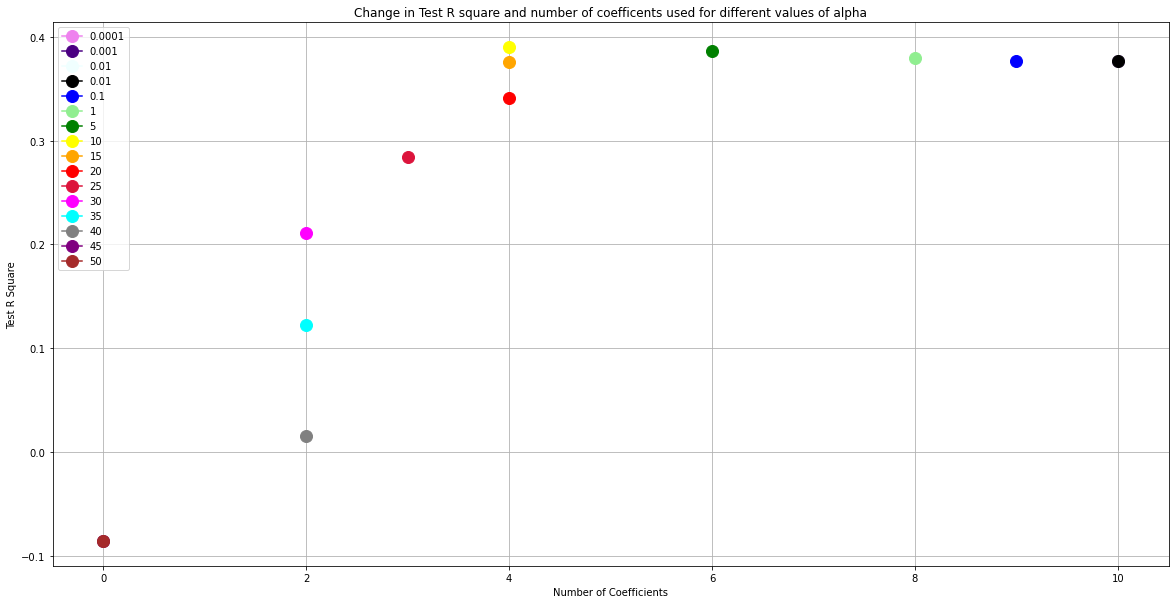

In [30]:
import matplotlib.pyplot as plt 
color = ["Violet","indigo","azure","black","Blue","lightgreen","Green","Yellow","Orange","red","crimson","magenta","cyan","grey","purple","brown","olive"]
plt.figure(figsize=[20,10])
for i in range(0,16) :
    plt.plot(results[i,0],results[i,1],c=color[i],marker='o',markersize=12,label=alpha[i])
plt.xlabel("Number of Coefficients")
plt.ylabel("Test R Square")
plt.title("Change in Test R square and number of coefficents used for different values of alpha")
plt.grid(b=True)
plt.legend()

The highest value of Test R square is observed for alpha = 10 post which the R square value starts to decrease again. Hence alpha = 10 provides the best performing model for the test set. 

As the value of alpha increases the error rate decreases till a certain point and then again starts to increase. Is point is the one with highest R square and the point of best alpha/model.

In [31]:
X_train_pr, X_valid, y_train_pr, y_valid = train_test_split(X_train_scaled,y_train, random_state=1214)
best_score = 0
validated_results = np.zeros([16,2])
alpha = [10**-4,10**-3,10**-2,10**-2,10**-1,1,5,10,15,20,25,30,35,40,45,50]
for i in alpha:
    lassox = Lasso(alpha=i).fit(X_train_pr,y_train_pr)
    score = lassox.score(X_valid,y_valid)
    print("Alpha: ",i," Validation R Square: ",score)
    if score > best_score :
        best_alpha = i
        best_score = score
lasso_best = Lasso(alpha=best_alpha).fit(X_train,y_train)
train_score = lasso_best.score(X_train,y_train)
test_score = lasso_best.score(X_test,y_test)
print("")
print("Best parameter alpha:", best_alpha)
print("Number of parameters used:", np.sum(lasso_best.coef_ != 0))
print("Training set R square with best parameters:", train_score) 
print("Test set R square with best parameters:", test_score)       

Alpha:  0.0001  Validation R Square:  0.4924585306870831
Alpha:  0.001  Validation R Square:  0.49250441784216403
Alpha:  0.01  Validation R Square:  0.49293398493641694
Alpha:  0.01  Validation R Square:  0.49293398493641694
Alpha:  0.1  Validation R Square:  0.4943550391900192
Alpha:  1  Validation R Square:  0.49080208281549975
Alpha:  5  Validation R Square:  0.4631195447408176
Alpha:  10  Validation R Square:  0.4531294953969447
Alpha:  15  Validation R Square:  0.42650549358866485
Alpha:  20  Validation R Square:  0.38301643292027276
Alpha:  25  Validation R Square:  0.32381362129132196
Alpha:  30  Validation R Square:  0.2531500196934654
Alpha:  35  Validation R Square:  0.16695692637390236
Alpha:  40  Validation R Square:  0.06491839284696133
Alpha:  45  Validation R Square:  -0.013251676035874294
Alpha:  50  Validation R Square:  -0.01878781283167741

Best parameter alpha: 0.1
Number of parameters used: 10
Training set R square with best parameters: 0.5445543623460898
Test set

# Inductive Conformal Prediction

In [32]:
#Spliting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target,random_state=1412)

In [33]:
#Splitting training set into calibration set of 99 recocords and rest as training set proper
X_train_calibration = X_train[0:99,:]
y_train_calibration = y_train[0:99]
X_train_pr = X_train[99:,:]
y_train_pr = y_train[99:]
print("Length of Calibration set is :",len(X_train_calibration))

Length of Calibration set is : 99


In [34]:
#Fitting the scaler to training set proper
scaler.fit(X_train_pr)

StandardScaler()

In [35]:
#Applying the scaling to both training sets and the test set
X_train_pr_scaled = scaler.transform(X_train_pr)
X_train_calibration_scaled = scaler.transform(X_train_calibration)
X_test_scaled = scaler.transform(X_test)

In [36]:
#Splitting the training set proper to proper and validation set for cross validation
X_train_pr1, X_valid1, y_train_pr1, y_valid1 = train_test_split(X_train_pr_scaled,y_train_pr, random_state=1214)


In [37]:
#Lasso with crossvalidation to decide the best alpha
best_score = 0
validated_results = np.zeros([16,2])
alpha = [10**-4,10**-3,10**-2,10**-2,10**-1,1,5,10,15,20,25,30,35,40,45,50]
for i in alpha:
    lassox = Lasso(alpha=i).fit(X_train_pr1,y_train_pr1)
    score = lassox.score(X_valid1,y_valid1)
    if score > best_score :
        best_alpha = i
        best_score = score
lasso_best = Lasso(alpha=best_alpha).fit(X_train_pr_scaled,y_train_pr)   

In [38]:
#Applying the best model on the calibration set
calibration_prediction = lasso_best.predict(X_train_calibration_scaled)
scores = abs(calibration_prediction - y_train_calibration )
scores = np.sort(scores)
print(scores)

[  1.45570134   2.01353316   3.47484912   3.86676432   4.54871543
   5.01763808   5.54076778   6.94674183   7.30879772   8.61883988
  10.69123948  11.12310018  11.77170792  11.94160382  13.92874637
  14.28687145  15.33753723  15.60608904  16.00481775  16.38738223
  18.03617266  18.89514992  19.02852044  19.18619588  19.25838339
  19.70227899  20.73207213  21.8684424   22.65219252  23.64701088
  23.91516981  24.37456923  25.80664322  26.39374015  27.16124633
  28.38187217  30.33668136  31.56920145  32.13123229  32.50336322
  33.47954638  35.76776109  36.39756926  36.86975699  36.91535558
  40.40476383  40.68867075  41.58102047  43.57516516  44.66207785
  46.0852186   46.11046557  46.34737363  46.60030622  46.67559658
  48.7924585   49.00308155  49.62548408  49.93499863  50.71186404
  52.57557367  52.89340291  53.19463984  53.4674999   56.00196318
  57.8423532   59.85291689  60.2702176   61.08990365  61.81765121
  64.4044118   64.53394419  65.11971697  65.35979787  66.0044294
  66.056346

In [39]:
#For significance level of 20%
k20 = math.ceil(((1 - 0.2)*(len(X_train_calibration) + 1)))
print("Value of k for significance level of 20%:",k20)
c20 = scores[k20-1]
print("Value of c for significance level of 20%:",c20)
print("Prediction Length for significance level of 20%:", 2*c20)

Value of k for significance level of 20%: 80
Value of c for significance level of 20%: 72.62867436849413
Prediction Length for significance level of 20%: 145.25734873698826


In [40]:
prediction = lasso_best.predict(X_test_scaled)
error_count=0
for i in range(len(prediction)):
    print("Prediction length for Sample ",i," is [",prediction[i]-c20,",",prediction[i]+c20,"]")
    if (y_test[i] < prediction[i]-c20 ) or (y_test[i] > prediction[i]+c20):
        error_count = error_count+1


Prediction length for Sample  0  is [ 78.95341329164901 , 224.21076202863728 ]
Prediction length for Sample  1  is [ 47.37446723713761 , 192.63181597412586 ]
Prediction length for Sample  2  is [ -7.202838628231149 , 138.0545101087571 ]
Prediction length for Sample  3  is [ 186.5981765439162 , 331.85552528090443 ]
Prediction length for Sample  4  is [ 7.066503048334027 , 152.3238517853223 ]
Prediction length for Sample  5  is [ 149.55252975909212 , 294.8098784960804 ]
Prediction length for Sample  6  is [ 98.81994041785688 , 244.07728915484515 ]
Prediction length for Sample  7  is [ 123.93082675140542 , 269.18817548839365 ]
Prediction length for Sample  8  is [ 191.18207909765542 , 336.43942783464365 ]
Prediction length for Sample  9  is [ -1.4683919742964804 , 143.78895676269178 ]
Prediction length for Sample  10  is [ 53.1267561670833 , 198.38410490407156 ]
Prediction length for Sample  11  is [ 129.8178397030441 , 275.0751884400323 ]
Prediction length for Sample  12  is [ 44.0723487

In [41]:
print("Error Rate of Inductive conformal Predictor at 20% significance Level: ",error_count/len(prediction))

Error Rate of Inductive conformal Predictor at 20% significance Level:  0.17117117117117117


In [42]:
#For significance level of 5%
k5 = math.ceil(((1 - 0.05)*(len(X_train_calibration) + 1)))
print("Value of k for significance level of 5%:",k5)
c5 = scores[k5-1]
print("Value of c for significance level of 5%:",c5)
print("Prediction Length for significance level of 5%:", 2*c5)

Value of k for significance level of 5%: 95
Value of c for significance level of 5%: 103.77709829514839
Prediction Length for significance level of 5%: 207.55419659029678


In [43]:
prediction = lasso_best.predict(X_test_scaled)
error_count=0
for i in range(len(prediction)):
    print("Prediction length for Sample ",i," is [",prediction[i]-c5,",",prediction[i]+c5,"]")
    if (y_test[i] < prediction[i]-c5 ) or (y_test[i] > prediction[i]+c5):
        error_count = error_count+1


Prediction length for Sample  0  is [ 47.80498936499475 , 255.35918595529154 ]
Prediction length for Sample  1  is [ 16.226043310483348 , 223.78023990078015 ]
Prediction length for Sample  2  is [ -38.35126255488541 , 169.20293403541137 ]
Prediction length for Sample  3  is [ 155.44975261726194 , 363.0039492075587 ]
Prediction length for Sample  4  is [ -24.081920878320233 , 183.47227571197655 ]
Prediction length for Sample  5  is [ 118.40410583243786 , 325.9583024227346 ]
Prediction length for Sample  6  is [ 67.67151649120262 , 275.2257130814994 ]
Prediction length for Sample  7  is [ 92.78240282475116 , 300.33659941504794 ]
Prediction length for Sample  8  is [ 160.03365517100116 , 367.58785176129794 ]
Prediction length for Sample  9  is [ -32.61681590095074 , 174.93738068934604 ]
Prediction length for Sample  10  is [ 21.97833224042904 , 229.53252883072582 ]
Prediction length for Sample  11  is [ 98.66941577638983 , 306.2236123666866 ]
Prediction length for Sample  12  is [ 12.9239

In [44]:
print("Error Rate of Inductive Conformal Predictor at 5% significance Level: ",error_count/len(prediction))

Error Rate of Inductive Conformal Predictor at 5% significance Level:  0.06306306306306306


# Results:

Lasso on Diabetes dataset from sklearn:

    Training R Square:  0.3710490118794657
    Test R Square:  0.32847652173697683
    
    Number of features used in the model: 4
    
    The features used are:

    bmi
    bp
    s3
    s5
    
Lasso on original Diabetes dataset:

    Training R Square:  0.537308531659811
    Test R Square:  0.3626403051692718
    
    Number of features used in the model: 10
    
    The features used are:
    
    age
    sex
    bmi
    bp
    s1
    s2
    s3
    s4
    s5
    s6
    
Lasso on scaled original Dataset:

    Training R Square:  0.5401388610861284
    Test R Square:  0.3796442379645816
    
    Number of features used in the model: 8
    
    The features used are:
    
    sex
    bmi
    bp
    s1
    s3
    s4
    s5
    s6


Best Lasso model with cross validation:


    Training set R square with best parameters: 0.5445543623460898
    Test set R square with best parameters: 0.37577614048016017
    
    Number of parameters used: 10
    
Inductive Conformal Predictor:

    20% significance level:
    
        Prediction Length for significance level of 20%: 145.25734873698826
        Error Rate of Inductive conformal Predictor at 20% significance Level:  0.17117117117117117
    
    
    5% significance level:
    
        Prediction Length for significance level of 5%: 207.55419659029678
        Error Rate of Inductive Conformal Predictor at 5% significance Level:  0.06306306306306306
        